# Example for using the WindpowerlibTurbine model

The `WindpowerlibTurbine` model can be used to determine the feed-in of a wind turbine using the windpowerlib.
The [windpowerlib](https://github.com/wind-python/windpowerlib) is a python library for simulating the performance of wind turbines and farms. For more information about the model check the [documentation of the windpowerlib](https://windpowerlib.readthedocs.io/en/stable/).

The following example shows you how to use the `WindpowerlibTurbine` model.

* [Set up WindPowerPlant object](#windpowerplant_object)
* [Get weather data](#weather_data)
* [Calculate feed-in](#feedin)

## Set up WindPowerPlant object <a class="anchor" id="windpowerplant_object"></a>

To calculate the feed-in using the `WindpowerlibTurbine` model you have to set up a `WindPowerPlant` object. You can import it as follows:

In [1]:
from feedinlib import WindPowerPlant

The wind power plant must have all power plant parameters required by the `WindpowerlibTurbine` model. The required parameters can be looked up in the [model's documentation](https://feedinlib.readthedocs.io/en/features-design-skeleton/temp/feedinlib.models.WindpowerlibTurbine.html#feedinlib.models.WindpowerlibTurbine.power_plant_requires).

The `WindpowerlibTurbine` model requires you to provide the turbine's **hub height** as well as the turbine's **power curve** or **power coefficient curve**. Alternatively to providing the curve(s) directly you can provide the **turbine type** which will retrieve the turbine's power and/or power coefficient curve from a wind turbine library provided along with the windpowerlib. For an overview of the provided wind turbines you can use the function `get_power_plant_data()`.

In [2]:
from feedinlib import get_power_plant_data

In [3]:
# get wind turbines
turbine_df = get_power_plant_data(dataset='oedb_turbine_library')
# print the first four turbines
turbine_df.iloc[1:5, :]

,manufacturer,turbine_type,has_power_curve,has_cp_curve
1,Enercon,E-101/3050,True,True
2,Enercon,E-101/3500,True,True
3,Enercon,E-115/3000,True,True
4,Enercon,E-115/3200,True,True


Now you can set up a wind turbine to calculate feed-in for:

In [4]:
# set up wind turbine using the wind turbine library
turbine_data = {
    'turbine_type': 'E-101/3050',  # turbine name as in turbine library
    'hub_height': 135  # in m
    }
wind_turbine = WindPowerPlant(**turbine_data)

## Get weather data <a class="anchor" id="weather_data"></a>

Besides setting up your wind turbine you have to provide weather data the feed-in is calculated with.
This example uses open_FRED weather data. For more information on the data and download see the [load_open_fred_weather_data Notebook](load_open_fred_weather_data.ipynb).

In [5]:
from feedinlib.db import Weather
from feedinlib.db import defaultdb
from shapely.geometry import Point

In [6]:
# specify latitude and longitude of wind turbine location
location = Point(13.5, 52.4)

In [7]:
# download weather data for June 2017
open_FRED_weather_data = Weather(
    start='2017-06-01', stop='2017-07-01', 
    locations=[location],
    heights=[140, 160],
    variables="windpowerlib",
    **defaultdb())

In [9]:
# get weather data in windpowerlib format
weather_df = open_FRED_weather_data.df(location=location, lib="windpowerlib")

KeyError: ('roughness_length', 0.0)

In [10]:
# plot wind speed
import matplotlib.pyplot as plt
%matplotlib inline
weather_df.loc[:, ['wind_speed']].plot(title='Wind speed')
plt.xlabel('Time')
plt.ylabel('Wind speed in m/s');

NameError: name 'weather_df' is not defined

## Calculate feed-in <a class="anchor" id="feedin"></a>

The feed-in can be calculated by calling the `WindPowerPlant`'s `feedin` method with the weather data.

In [12]:
feedin = wind_turbine.feedin(
    weather=weather_df)

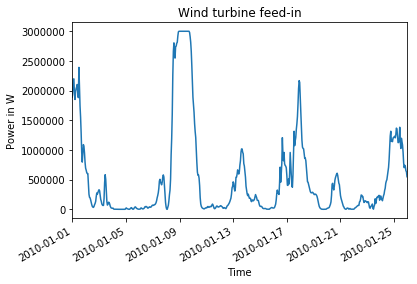

In [13]:
# plot calculated feed-in
import matplotlib.pyplot as plt
%matplotlib inline
feedin.plot(title='Wind turbine feed-in')
plt.xlabel('Time')
plt.ylabel('Power in W');

**Scaled feed-in**

The wind turbine feed-in can also be automatically scaled by the turbine's nominal power.

In [14]:
# calculate scaled feed-in
feedin_scaled = wind_turbine.feedin(
    weather=weather_df,
    scaling='nominal_power')

The turbine's nominal power can be retrieved as follows:

In [15]:
wind_turbine.nominal_power

3050000.0

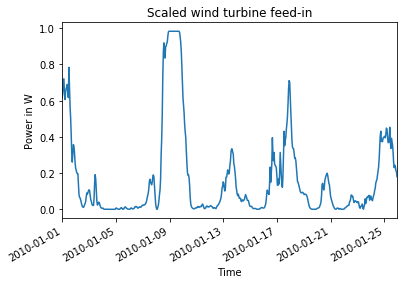

In [16]:
# plot calculated feed-in
import matplotlib.pyplot as plt
%matplotlib inline
feedin_scaled.plot(title='Scaled wind turbine feed-in')
plt.xlabel('Time')
plt.ylabel('Power in W');

**Feed-in with optional model parameters**

In order to change the default calculation configurations of the `WindpowerlibTurbine` model to e.g. use the turbine's power coefficient curve instead of power curve you can pass further parameters to the `feedin` method. An overview of which further parameters may be provided is documented under the [feedin method](https://feedinlib.readthedocs.io/en/features-design-skeleton/temp/feedinlib.models.WindpowerlibTurbine.html#feedinlib.models.WindpowerlibTurbine.feedin)'s kwargs.

In [17]:
# use density corrected power curve to calculate feed-in
feedin_density_corrected = wind_turbine.feedin(
    weather=weather_df,
    density_correction=True)

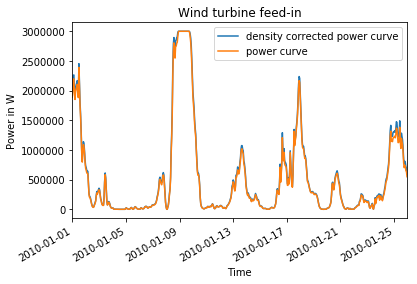

In [18]:
# plot calculated feed-in
import matplotlib.pyplot as plt
%matplotlib inline
feedin_density_corrected.plot(title='Wind turbine feed-in', legend=True,
                              label='density corrected power curve')
feedin.plot(legend=True, label='power curve')
plt.xlabel('Time')
plt.ylabel('Power in W');

In [19]:
# use power coefficient curve to calculate feed-in
feedin_coefficient_curve = wind_turbine.feedin(
    weather=weather_df,
    power_output_model='power_coefficient_curve')

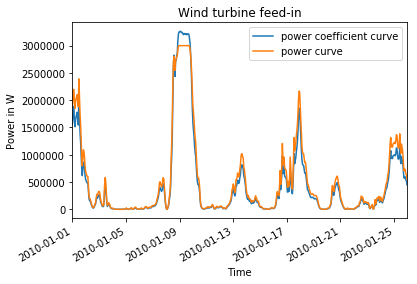

In [20]:
# plot calculated feed-in
import matplotlib.pyplot as plt
%matplotlib inline
feedin_coefficient_curve.plot(title='Wind turbine feed-in', legend=True,
                              label='power coefficient curve')
feedin.plot(legend=True, label='power curve')
plt.xlabel('Time')
plt.ylabel('Power in W');